# Lecture 23: Data Exploration

CSCI 1360: Foundations for Informatics and Analytics

http://www.unofficialgoogledatascience.com/2016/10/practical-advice-for-analysis-of-large.html

## Overview and Objectives

We've previously covered the basics of exploring data. In this lecture, we'll go into a bit more detail of some of the slightly more formal strategies of "data munging," including introducing the `pandas` DataFrame for organizing your data. By the end of this lecture, you should be able to

 - Generate histograms and plots for exploring 1D and 2D data
 - Rescale and normalize data to more directly compare different distributions
 - Import data into pandas DataFrames and perform basic analyses

## Part 1: Exploring

As has been (hopefully) hammered at you over the past few weeks, one particularly important skill that all data scientists must have is the ability to **explore your data.**

If you recall way back in [Lecture 13 on working with text](http://nbviewer.jupyter.org/format/slides/github/eds-uga/csci1360e-su16/blob/master/lectures/L13.ipynb#/), I mentioned something about structured versus unstructured data, and how the vast majority of data out there falls in the latter category.

You can't work directly with data that is unstructured! So you have to give it structure. But in order to do that, you have to *understand* your data.

### One dimension

This is about as simple as it gets: your data consist of a list of numbers. We saw in previous lectures that you can compute statistics (mean, median, variance, etc) on these numbers. You can also visualize them using histograms. We'll reiterate that point here, using a particular example.

In [1]:
import numpy as np
np.random.seed(3908544)

# Generate two random datasets.
data1 = np.random.normal(loc = 0, scale = 58, size = 1000)
data2 = 200 * np.random.random(1000) - 100

# What are their means and variances?
print("Dataset 1 :: {:.2f} (avg) :: {:.2f} (std)".format(data1.mean(), data1.std()))
print("Dataset 2 :: {:.2f} (avg) :: {:.2f} (std)".format(data2.mean(), data2.std()))

Dataset 1 :: 1.60 (avg) :: 57.68 (std)
Dataset 2 :: 1.88 (avg) :: 57.92 (std)


Both datasets contain 1000 random numbers. Both datasets have very nearly the same mean and same standard deviation.

But the two datasets *look* very different!

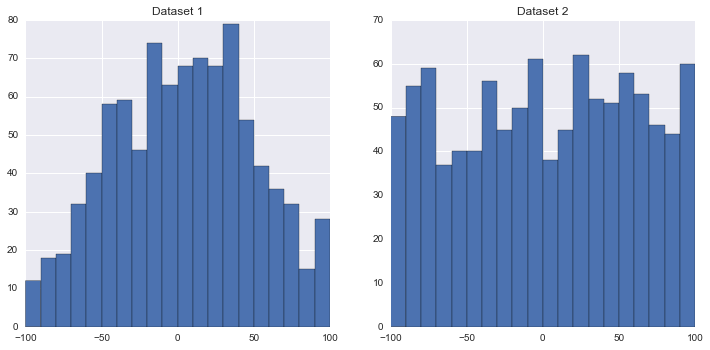

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure().set_figwidth(12)
plt.subplot(121)
plt.title("Dataset 1")
_ = plt.hist(data1, bins = 20, range = (-100, 100))
plt.subplot(122)
plt.title("Dataset 2")
_ = plt.hist(data2, bins = 20, range = (-100, 100))

Behold: the importance of viewing your data! Dataset 1 is drawn from a Gaussian (normal), while Dataset 2 is uniform.

### Two dimensions

Two (and even three) dimensions? **Scatter plots** are your friend. Consider the following fake datasets.

In [3]:
np.random.seed(8493248)

X = np.random.normal(size = 1000)
Y1 = (X + np.random.normal(size = 1000) / 2)
Y2 = (-X + np.random.normal(size = 1000) / 2)

If you plotted `Y1` and `Y2` using the histograms from the previous strategy, you'd get two datasets that looked pretty much identical.

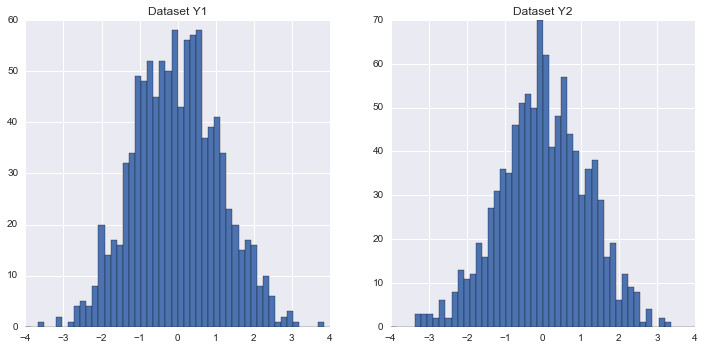

In [4]:
plt.figure().set_figwidth(12)
plt.subplot(121)
plt.title("Dataset Y1")
_ = plt.hist(Y1, bins = 50, range = (-4, 4))
plt.subplot(122)
plt.title("Dataset Y2")
_ = plt.hist(Y2, bins = 50, range = (-4, 4))

Maybe *slightly* different shapes, but qualitatively (and statistically) identical.

But what if we visualized the data in 2D using a scatter plot?

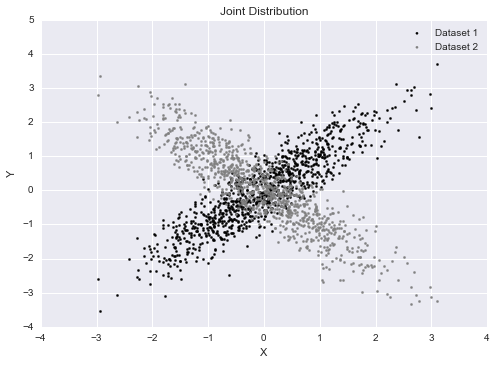

In [5]:
plt.scatter(X, Y1, marker = ".", color = "black", label = "Dataset 1")
plt.scatter(X, Y2, marker = ".", color = "gray", label = "Dataset 2")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc = 0)
plt.title("Joint Distribution")

DIFFERENT, again!

These two datasets are *anticorrelated*. To see what this means, we can derive the correlation coefficients for the two datasets independently:

In [6]:
print(np.corrcoef(X, Y1)[0, 1])
print(np.corrcoef(X, Y2)[0, 1])

0.896816214735
-0.895177590207


"Correlation" means as we change one variable (X), another variable changes by a similar amount (Y). Positive correlation means as we increase one variable, the other increases; negative correlation means as we increase one variable, the other *decreases*.

Anticorrelation, then, is the presence of both positive and negative correlation, which is what we see in this dataset: one has a correlation coefficient of 0.9 (1.0 is perfect positive correlation), while the other is -0.9 (-1.0 is perfect negative correlation).

**This is something we'd only know from either visualizing the data or examining how the data are correlated.**

### More than two dimensions

If you have 3D data, matplotlib is capable of displaying that. But beyond three dimensions, it can get tricky. A good starting point is to make a *correlation matrix*, where the $i^{th}$ row and $j^{th}$ column of the matrix is the correlation coefficient between the $i^{th}$ and $j^{th}$ dimensions of the data.

Another strategy is to create 2D scatter plots of every pairwise combinations of dimensions. For every $i^{th}$ and $j^{th}$ dimension in the data, create a 2D scatter plot like we did in the last slide. This way, you can visualize each dimensions relative to each other dimension and easily spot any correlations.

The upshot here is to **find a way to visualize your data**.

## Part 2: Rescaling

Many data science analysis techniques can be sensitive to the *scale* of your data. This is where normalization or *scaling* your data can help immensely.

Let's say you're interested in grouping together your friends based on height and weight. You collect the following data points:

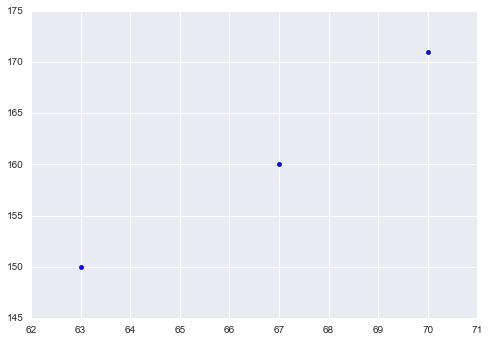

In [7]:
personA = np.array([63, 150])  # 63 inches, 150 pounds
personB = np.array([67, 160])  # 67 inches, 160 pounds
personC = np.array([70, 171])  # 70 inches, 171 pounds

plt.scatter(personA[0], personA[1])
plt.scatter(personB[0], personB[1])
plt.scatter(personC[0], personC[1])

And you compute the "distance" between each point (we'll just use standard Euclidean distance):

In [8]:
import numpy.linalg as nla
print("A to B: {:.2f}".format( nla.norm(personA - personB) ))
print("A to C: {:.2f}".format( nla.norm(personA - personC) ))
print("B to C: {:.2f}".format( nla.norm(personB - personC) ))

A to B: 10.77
A to C: 22.14
B to C: 11.40


As you can see, the two closest data points are person A and person B.

But now your UK friend comes to you with the same dataset but a totally different conclusion! Turns out, this friend computed the heights of everyone in *centimeters*, rather than inches, giving the following dataset:

A to B: 14.28
A to C: 27.53
B to C: 13.37


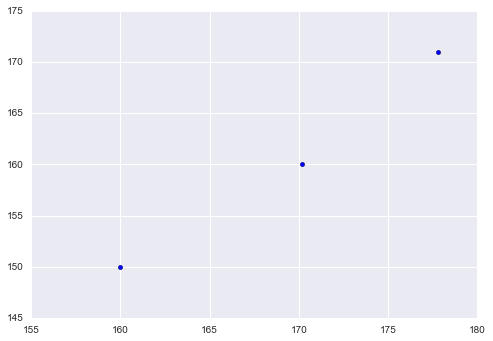

In [9]:
personA = np.array([160.0, 150])  # 160 cm, 150 pounds
personB = np.array([170.2, 160])  # 170.2 cm, 160 pounds
personC = np.array([177.8, 171])  # 177.8 cm, 171 pounds

plt.scatter(personA[0], personA[1])
plt.scatter(personB[0], personB[1])
plt.scatter(personC[0], personC[1])

print("A to B: {:.2f}".format( nla.norm(personA - personB) ))
print("A to C: {:.2f}".format( nla.norm(personA - personC) ))
print("B to C: {:.2f}".format( nla.norm(personB - personC) ))

Using this data, we arrive at the conclusion that persons B and C are most similar! Oops...?

It can be very problematic if a simple change of units completely alters the conclusions you draw from the data. One way to deal with this is through scaling--we've actually done this before in a homework assignment.

By rescaling the data, we eliminate any and all units. We remove the mean (subtract it off) and divide by the standard deviation, so if you had to include a unit, it would essentially be units of "standard deviations away from 0."

In [10]:
def rescale(data):
    # First: subtract off the mean of each column.
    data -= data.mean(axis = 0)
    
    # Second: divide by the standard deviation of each column.
    data /= data.std(axis = 0)
    
    return data

np.random.seed(3248)
X = np.random.random((5, 3))  # Five rows with three dimensions.

print("=== BEFORE ===")
print("Means: {}\nStds: {}".format(X.mean(axis = 0), X.std(axis = 0)))

Xs = rescale(X)

print("=== AFTER ===")
print("Means: {}\nStds: {}".format(Xs.mean(axis = 0), Xs.std(axis = 0)))

=== BEFORE ===
Means: [ 0.4303258   0.53938706  0.52770194]
Stds: [ 0.17285592  0.27353295  0.23789391]
=== AFTER ===
Means: [ -2.66453526e-16  -6.66133815e-17  -4.44089210e-17]
Stds: [ 1.  1.  1.]


Of course, like anything (everything?), there are still caveats.

 - There is an implicit assumption being made when you rescale your data: that your dimensions are distributed like a Gaussian. If this is not true--or even worse, true for *some* dimensions but not others--you risk creating more problems than you solve by putting dimensions on "equal" footing that shouldn't be.

 - On the other hand, rescaling your data can do wonders to mitigate or even eliminate the effects of outliers on your data. Rescaling will maintain *relative* distances (in terms of standard deviations) between dimensions, but will eliminate *absolute* differences that could just be flukes.

 - As always, be careful about numerical round-off errors. You'll notice none of the means in the previous slide were *exactly* 0; this has to do with the precision of floating-point numbers and this precise behavior can vary depending on what operating system you're using.

## Part 3: DataFrames

*DataFrames* are a relatively new data structure on the data science scene. Equal parts spreadsheet, database, and array, they are capable of handling rich data formats as well as having built-in methods for dealing with the idiosyncrasies of unstructured datasets.

As Jake wrote in his book, *Python Data Science Handbook*:

 > NumPy's `ndarray` data structure provides essential features for the type of clean, well-organized data typically seen in numerical computing tasks. While it serves this purpose very well, its limitations become clear when we need more flexibility (such as attaching labels to data, working with missing data, etc.) and when attempting operations which do not map well to element-wise broadcasting (such as groupings, pivots, etc.), each of which is an important piece of analyzing the less structured data available in many forms in the world around us. Pandas [...] builds on the NumPy array structure and provides efficient access to these sorts of "data munging" tasks that occupy most of a data scientist's time."

What exactly is a DataFrame, then?

Well, it's a collection of Series! `</unhelpful>`

In [11]:
import pandas as pd  # "pd" is the import convention, like "np" is for NumPy
data = pd.Series([0.25, 0.5, 0.75, 1])
print(data)

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64


Think of a `Series` as a super-fancy 1D NumPy array. It's so fancy, in fact, that you can give a `Series` completely custom indices, sort of like a dictionary. 

In [12]:
data = pd.Series({2:'a', 1:'b', 3:'c'})
print(data)

1    b
2    a
3    c
dtype: object


If a `Series` is essentially a fancy 1D NumPy array, then a DataFrame is a fancy 2D array. Here's an example.

In [13]:
# Standard Python dictionary, nothing new and exciting.
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)  # Oh right: you can feed dicts to Series!

area_dict = {'California': 423967,
             'Texas': 695662,
             'New York': 141297,
             'Florida': 170312,
             'Illinois': 149995}
area = pd.Series(area_dict)

# Build the DataFrame!
states = pd.DataFrame({'population': population,
                      'area': area})
print(states)

              area  population
California  423967    38332521
Florida     170312    19552860
Illinois    149995    12882135
New York    141297    19651127
Texas       695662    26448193


DataFrames are really nice--you can directly access all the extra information they contain.

In [14]:
print(states.index)  # Our row names

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')


In [15]:
print(states.columns)  # Our Series / column names

Index(['area', 'population'], dtype='object')


You can also directly access the property you're interested in, rather than having to memorize the index number as with NumPy arrays:

In [16]:
print(states['population'])

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
Name: population, dtype: int64


But you can also access the same information *almost* as you would with a NumPy array:

In [17]:
print(states.iloc[:, 1])

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
Name: population, dtype: int64


Note the use of the `.iloc` attribute of DataFrames.

This is to handle the fact that you can assign *entirely customized* integer indices to DataFrames, resulting in potentially confusing behavior when you slice them--if you slice with `1:3`, are you referring to the first and third items in the DataFrame, or the items you specifically indexed as the first and third items? With DataFrames, these can be two different concepts!

 - Use `.iloc` if you want to use *implicit* ordering, meaning the automatic Python internal ordering.
 - Use `.loc` if you want to use *explicit* ordering, or the ordering that you set when you built the DataFrame.
 - Use `.ix` if you want a *hybrid* of the two.

If you just want the whipper-snappers to get off your lawn, don't worry about this distinction. As long as you don't explicitly set the indices yourself when you build a DataFrame, just use `iloc`.

### Missing data

So what do DataFrames have to do with data exploration?...besides making it really easy, of course.

pandas has some phenomenal missing-data capabilities built-in to Series and DataFrames. As an example by comparison, let's see what happens if we have a `None` or `NaN` in our NumPy array when we try to do arithmetic.

In [21]:
x = np.array([0, 1, None, 2])
print(x.sum())

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

Welp, that crashed and burned. What about using `NaN` instead?

In [19]:
x = np.array([0, 1, np.nan, 2])
print(x.sum())

nan


Well, it didn't crash. But since "NaN" specifically stands for "Not A Number", it makes arithmetic difficult since any operation involving a `NaN` will return `NaN`.

A Series has a bunch of tools available to us to sniffing out missing values and handling them gracefully.

 - **`isnull()`**: generate a boolean mask which indicates where there are missing values.
 - **`notnull()`**: opposite of `isnull()`.
 - **`dropna()`**: return a version of the data that drops all `NaN` values.
 - **`fillna()`**: return a copy of the data with `NaN` values filled in with something else or otherwise imputed.

In [20]:
data = pd.Series([1, np.nan, 'hello', None])
print(data.isnull())  # Where are the null indices?
print()
print(data[data.notnull()])  # Use the boolean mask to pull out non-null indices.

0    False
1     True
2    False
3     True
dtype: bool

0        1
2    hello
dtype: object


This is but a tiny taste of the majesty that is the pandas package. I highly recommend checking it out further.

## Review Questions

Some questions to discuss and consider:

1: What are the advantages and disadvantages of using pandas DataFrames instead of NumPy arrays?

2: Name three strategies for visualizing and exploring 5-dimensional data. What are the pros and cons of each?

3: You're putting your data science skills to work and writing a program that automatically classifies web articles into semantic categories (e.g. sports, politics, food, etc). You start by counting words, resulting in a model with 100,000 dimensions (words are dimensions!). Can you come up with any kind of strategy for exploring these data?

## Course Administrivia

 - One more week left of class! (after this week)

 - A10 is due Thursday evening, and A11 (the final assignment!) will be released that morning.

 - Penultimate flipped lecture tomorrow!

## Additional Resources

 1. Grus, Joel. *Data Science from Scratch*, Chapter 10. 2015. ISBN-13: 978-1491901427
 2. VanderPlas, Jake. *Python Data Science Handbook*, Chapter 4. 2015. ISBN-13: 978-1491912058